In [20]:
# Import Data Set 


!unzip /content/drive/MyDrive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/dataset_updated/training_set/sculpture/i - 968 20.26.47.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 969.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 97.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 970.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 971.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 972.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 973.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 974.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 976.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 977.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 978.jpeg  
  inflating: dataset/dataset_updated/training_set/sculpture/i - 979.jpeg  
  inflating: dataset/dataset_updated/trai

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab , lab2rgb
from skimage.io import imread, imshow
import shutil
import os 

from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from keras.models import Sequential 


In [22]:
TRAIN_ROOT_DIR= "/content/dataset/dataset_updated/training_set"
DEST ="/content/train/images"

In [23]:
if not os.path.exists(DEST):
  os.makedirs(DEST)

  for dir in os.listdir(TRAIN_ROOT_DIR):
    for img in os.listdir(os.path.join(TRAIN_ROOT_DIR, dir)):
      ORG = os.path.join(TRAIN_ROOT_DIR, dir, img)
      try:
        imread(ORG)
        shutil.copy(ORG,DEST)
      except:
        print (f"Image at{ORG} cannot be read ")

In [24]:
len(os.listdir('/content/train/images'))

4746

In [25]:
train_datagen=ImageDataGenerator(rescale=1/255,
                                 featurewise_center=True, 
                                 rotation_range=40, 
                                 horizontal_flip= True, 
                                  )

In [26]:
train= train_datagen.flow_from_directory("/content/train", target_size=(256,256), batch_size=2500, shuffle=True)

Found 4746 images belonging to 1 classes.


In [27]:
#TO visualise image

t_img, label = train.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [28]:
def plotImage(img_arr, label):
  plt.figure(figsize= (5,5))

  for im, l in zip(img_arr,label):

    plt.imshow(im)
    plt.title(im.shape)
    plt.axis('off')
    plt.show



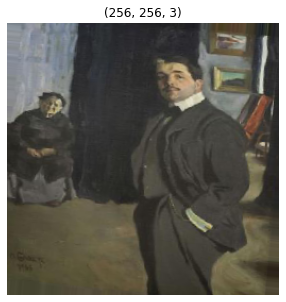

In [29]:
plotImage(t_img[:10],label[:10])

In [30]:
t_img[:10].shape

(10, 256, 256, 3)

In [31]:
X=[]
y=[]

In [32]:
for img in t_img:
  try:
    lab=rgb2lab(img)
    X.append(lab[:,:,0])
    y.append(lab[:,:,1:]/128)
  except:
    print("error")

In [33]:
X_train = np.array(X)
X_train = np.expand_dims(X_train, axis=len(X_train.shape))

y_train = np.array(y)

BUILD MODEL ENCODER AND DECODER

In [34]:

#encoder
model = Sequential()
model.add(Conv2D(64,(3,3), activation= 'relu', padding='same', strides =2, input_shape=(256,256,1)))
model.add(Conv2D(128,(3,3), activation= 'relu', padding='same',))
model.add(Conv2D(128,(3,3), activation= 'relu', padding='same', strides =2))
model.add(Conv2D(256,(3,3), activation= 'relu', padding='same',))
model.add(Conv2D(256,(3,3), activation= 'relu', padding='same', strides =2))
model.add(Conv2D(512,(3,3), activation= 'relu', padding='same',))
model.add(Conv2D(512,(3,3), activation= 'relu', padding='same',))
model.add(Conv2D(256,(3,3), activation= 'relu', padding='same',))


#decoder

model.add(Conv2D(128,(3,3), activation= 'relu', padding='same',))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3), activation= 'relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation= 'relu', padding='same'))
model.add(Conv2D(16,(3,3), activation= 'relu', padding='same'))
model.add(Conv2D(2, (3,3), activation = LeakyReLU(alpha=0.01), padding ='same'))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 512)      

In [35]:
model.compile(optimizer='adam', metrics =['acc'], loss='mse')

In [36]:
his = model.fit(X_train, y_train, epochs =100, batch_size=64, steps_per_epoch=X_train.shape[0]//64, verbose=1)

Epoch 1/100
39/39 [==============================] - 51s 647ms/step - loss: 0.2337 - acc: 0.8155
Epoch 2/100
39/39 [==============================] - 25s 623ms/step - loss: 0.0106 - acc: 0.8371
Epoch 3/100
39/39 [==============================] - 24s 608ms/step - loss: 0.0091 - acc: 0.8332
Epoch 4/100
39/39 [==============================] - 24s 615ms/step - loss: 0.0088 - acc: 0.8350
Epoch 5/100
39/39 [==============================] - 24s 614ms/step - loss: 0.0086 - acc: 0.8355
Epoch 6/100
39/39 [==============================] - 24s 611ms/step - loss: 0.0087 - acc: 0.8340
Epoch 7/100
39/39 [==============================] - 24s 613ms/step - loss: 0.0084 - acc: 0.8357
Epoch 8/100
39/39 [==============================] - 24s 614ms/step - loss: 0.0082 - acc: 0.8358
Epoch 9/100
39/39 [==============================] - 24s 615ms/step - loss: 0.0085 - acc: 0.8347
Epoch 10/100
39/39 [==============================] - 24s 611ms/step - loss: 0.0082 - acc: 0.8321
Epoch 11/100
39/39 [=========

In [38]:
model.save("./model.h5")

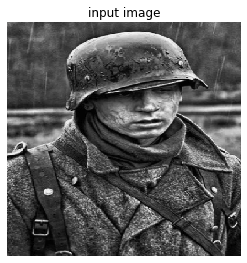

In [40]:
img1_color =[]
path="/content/Screenshot 2022-07-21 at 23.10.13.png"
img=img_to_array(
    load_img(path, target_size=(256,256,3))
)/255

plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()

In [41]:
img1_color.append(img)

img1_color = rgb2lab(img1_color)[:,:,:,0]

img1_color = img1_color.reshape(img1_color.shape+(1,))


In [43]:
output1 = model.predict(img1_color)
output1=output1*128


In [46]:
result = np.zeros((256,256,3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]


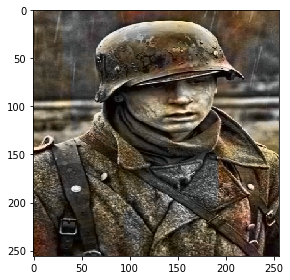

In [47]:
imshow(lab2rgb(result))